In [255]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [256]:
def pbrfunc(beta,theta,n=3):
    return (1. + np.exp(1j*beta) * np.tan(0.5*theta))**n


/home/calvin/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


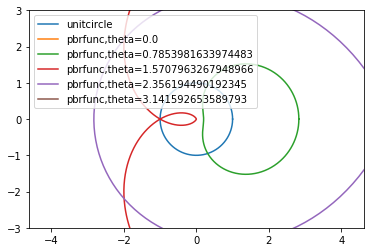

In [257]:
beta = np.linspace(0,2*np.pi,1000)
plt.figure()
plt.plot(np.cos(beta),np.sin(beta),label='unitcircle')

for theta in np.linspace(0,np.pi,5):
    z = pbrfunc(beta,theta,n=3)
    plt.plot(np.real(z),np.imag(z),label='pbrfunc,theta='+str(theta))

plt.axis([-3,3,-3,3])
plt.axes().set_aspect('equal', 'datalim')
plt.legend()

In [258]:
pTT = {'xi1':lambda TA,TB: 0.5*np.sin(np.pi * (TA + TB)/180)**2,
       'xi2':lambda TA,TB: 1/2 * np.cos(np.pi * (TA - TB - 45)/180)**2,
       'xi3':lambda TA,TB: 1/2 * np.cos(np.pi * (TA - TB + 45)/180)**2,
       'xi4':lambda TA,TB: 0.5*np.cos(np.pi * (TA + TB)/180)**2}

In [323]:
allE = np.zeros((4,4,4))

In [324]:
thetaA = np.array([0,22.5,45,67.5])
thetaB = np.array([0,22.5,45,67.5])
TA,TB = np.meshgrid(thetaA,thetaB)
allE[0,:] = 4 * pTT['xi1'](TA,TB) - 1
allE[1,:] = 4 * pTT['xi2'](TA,TB) - 1
allE[2,:] = 4 * pTT['xi3'](TA,TB) - 1
allE[3,:] = 4 * pTT['xi4'](TA,TB) - 1

In [344]:
def cage22(ax,xy=np.array([0,0]),color='orange',linestyle='-',linewidth=3):
    ax.add_artist(patches.Rectangle(xy, 2,2,color=color, fill=None,linestyle=linestyle,linewidth=linewidth))
    ax.add_artist(patches.Circle(xy,radius=0.2,color=color))
    ax.add_artist(patches.Circle(xy+np.array([0,2]),radius=0.2,color=color))
    ax.add_artist(patches.Circle(xy+np.array([2,0]),radius=0.2,color=color))
    ax.add_artist(patches.Circle(xy+np.array([2,2]),radius=0.2,color=color))

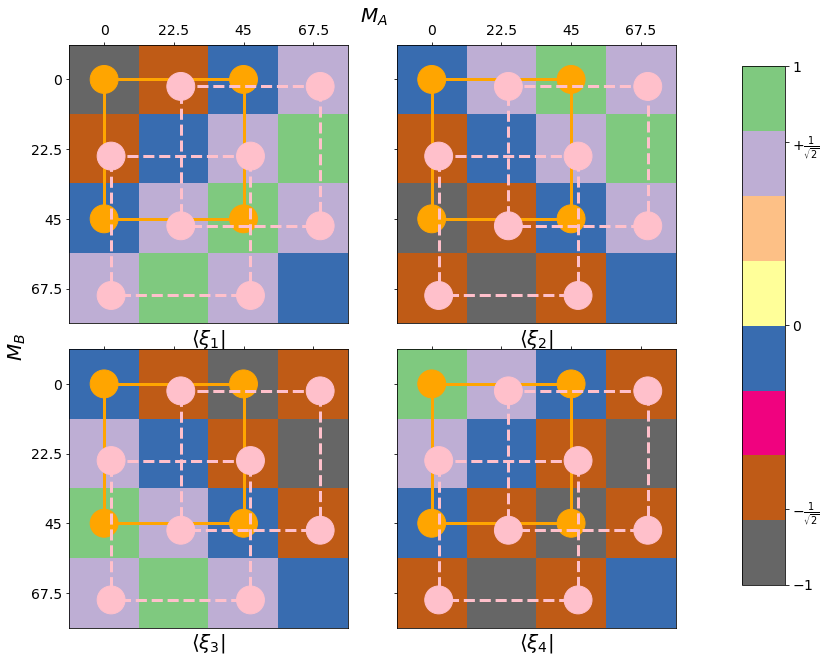

In [345]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
bigf = 20
smallf = 14

for xidx, ax in enumerate(axs.flat):
    im = ax.imshow(allE[xidx]-1e-9,vmax=1,vmin=-1,cmap='Accent_r')
    ax.set_xticks(np.arange(thetaA.size), minor=False)
    ax.xaxis.tick_top()
    ax.set_yticks(np.arange(thetaB.size), minor=False)
    ax.set_xlabel(r"$\langle \xi_"+str(xidx+1)+" |$",fontsize=bigf)
    cage22(ax,xy=(0,0),color='orange',linestyle='-',linewidth=3)
    cage22(ax,xy=[1.1,0.1],color='pink',linestyle='--')
    cage22(ax,xy=[0.1,1.1],color='pink',linestyle='--')    
axs[0][0].set_xticklabels(['0','22.5','45','67.5'], minor=False,fontsize=smallf)
axs[0][0].set_yticklabels(['0','22.5','45','67.5'], minor=False,fontsize=smallf)
axs[1][0].set_yticklabels(['0','22.5','45','67.5'], minor=False,fontsize=smallf)
axs[0][1].set_xticklabels(['0','22.5','45','67.5'], minor=False,fontsize=smallf)
axs[1][0].set_xticklabels([], minor=False,fontsize=smallf)
axs[0][1].set_yticklabels([], minor=False,fontsize=smallf)
axs[1][1].set_xticklabels([], minor=False,fontsize=smallf)
axs[1][1].set_yticklabels([], minor=False,fontsize=smallf)

fig.text(0.425, 0.9, r'$M_A$', ha='center',fontsize=bigf)
fig.text(0.0,   0.525, r"$M_B$", va='center', rotation='vertical',fontsize=bigf)

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
fig.subplots_adjust(top = 0.875, right=0.8,bottom = 0.2)
cax = fig.add_axes([0.85, 0.25, 0.05, 0.6])

cbar = fig.colorbar(im, cax=cax)
cbar.set_ticks([-1,-1/np.sqrt(2),0,1/np.sqrt(2),1])
cax.set_yticklabels([r'$-1$',r'$-\frac{1}{\sqrt{2}}$',r'$0$',r'$+\frac{1}{\sqrt{2}}$',r'$1$'],fontsize=smallf)
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(fig)
#cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = plt.colorbar(im, cax=cax, orientation='vertical')
#cbar.set_ticks([-1,-1/np.sqrt(2),0,1/np.sqrt(2),1])
#cax.set_yticklabels(['-1',r'$-\frac{1}{\sqrt{2}}$','0',r'$+\frac{1}{\sqrt{2}}$','1'],fontsize=smallf)
plt.savefig('/home/calvin/Documents/chsh/checkerboard.png')